# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
number= 0

name=[]
lat=[]
lon=[]
temp=[]
max_temp=[]
wind_spd=[]
clouds=[]
humidity=[]

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" + city

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    number=number+1

    try:
        print(f"{number}: {weather_json['name']}")
        name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_spd.append(weather_json['wind']['speed'])
        clouds.append(weather_json['clouds']['all'])
        humidity.append(weather_json['main']['humidity'])
    except:
        print("Missing name data")
        name.append("Missing data")
        lat.append("Missing data")
        lon.append("Missing data")
        temp.append("Missing data")
        max_temp.append("Missing data")
        wind_spd.append("Missing data")
        clouds.append("Missing data")
        humidity.append("Missing data")

Missing name data
2: Grindavik
3: Korhogo
4: Honiara
5: De Aar
6: Río Gallegos
7: Moose Factory
8: Namatanai
Missing name data
10: Mataura
11: Hermanus
12: Saint-Pierre
13: Vila Velha
14: Praia
15: Poum
Missing name data
17: Nikolskoye
Missing name data
19: Leningradskiy
20: Puerto Ayora
21: Qaanaaq
Missing name data
23: Lagoa
24: Naples
25: Altayskoye
26: Vanimo
27: Goderich
28: Krasnovishersk
Missing name data
30: Arraial do Cabo
31: Albany
32: Kapaa
33: Ol'ga
Missing name data
35: Rikitea
36: Cape Town
37: Bluff
38: Souillac
39: Presidencia Roque Sáenz Peña
40: Iqaluit
41: Tura
42: Sergeevka
43: Ushuaia
44: Bredasdorp
45: Qandala
46: Opuwo
47: Upernavik
48: Shubarkuduk
49: Santa Marta
50: Pandan
51: Zdzieszowice
52: Mahébourg
53: Cherskiy
54: Ust'-Koksa
55: Severo-Kuril'sk
56: New Norfolk
57: Geraldton
58: Okha
59: Broken Hill
60: Plainview
61: Punta Arenas
62: Chui
63: Touros
64: Hilo
65: East London
66: Belyy Yar
67: Zhigansk
68: Pangnirtung
69: Vaini
70: Kalmunai
71: Aranos
72: B

563: Ponta Delgada
564: Inírida
565: Pervomayskoye
566: Codrington
567: Tilichiki
568: Son La
569: Conceição do Mato Dentro
570: Mahibadhoo
571: Gizo Government Station
572: Safi
573: Mergen
574: Sydney
575: Necochea
576: Berlevåg
577: Helena
578: Rochester
579: Puerto Baquerizo Moreno
580: Broome
581: Arman'
582: Iskateley
583: Punto Fijo
584: Narsaq
585: San Cristobal
586: Dulyapino
587: Quatre Cocos
588: Verkhoyansk
589: Pavlovsk
590: Nouadhibou
591: Khotyn
592: Quepos
593: Talwāra
594: The Valley
Missing name data
596: Colares
597: Honolulu
598: Changping
599: Hadrut
600: Nizhniy Tsasuchey
601: Hofn
602: Cabra
603: Brownsville
604: Praia da Vitória
605: Nyurba
606: Chivay
607: Tayga
608: Gazli
609: Imbituba
610: High Rock
611: Andalan
612: Tornio
613: Brae


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = {
    'city': name,
    'latitude':lat,
    'longitude':lon,
    'temperature':temp,
    'max temperature':max_temp,
    'wind speed':wind_spd,
    'cloudiness':clouds,
    'humidity':humidity
}

original_city_df = pd.DataFrame(city_data)
original_city_df.head()

,city,latitude,longitude,temperature,max temperature,wind speed,cloudiness,humidity
0,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data
1,Grindavik,63.8424,-22.4338,43.27,43.27,25.32,90,93
2,Korhogo,9.45,-5.6333,82.02,82.02,4.23,68,62
3,Honiara,-9.4333,159.95,76.44,76.44,5.68,49,87
4,De Aar,-30.6497,24.0123,62.38,62.38,12.84,30,35


In [6]:
city_df = original_city_df.loc[original_city_df['latitude'] != 'Missing data']
city_df.count()

city               565
latitude           565
longitude          565
temperature        565
max temperature    565
wind speed         565
cloudiness         565
humidity           565
dtype: int64

In [7]:
city_df.to_csv('../cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humid = city_df.loc[city_df['humidity'] > 100]
humid.count()

city               0
latitude           0
longitude          0
temperature        0
max temperature    0
wind speed         0
cloudiness         0
humidity           0
dtype: int64

In [10]:
#  Get the indices of cities that have humidity over 100%.



In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
city_lat = city_df['latitude']
city_temp = city_df['temperature']
city_humidity = city_df['humidity']
city_cloud = city_df['cloudiness']
city_wind =city_df['wind speed']

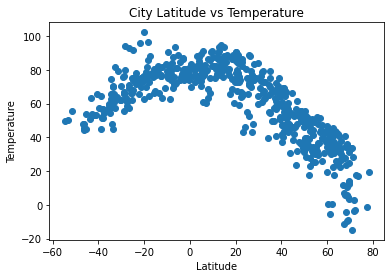

In [12]:
plt.scatter(city_lat,city_temp)

plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.savefig("lat-temp.png")
plt.show()

## Latitude vs. Humidity Plot

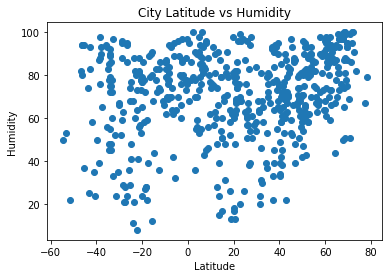

In [13]:
plt.scatter(city_lat,city_humidity)

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("lat-hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

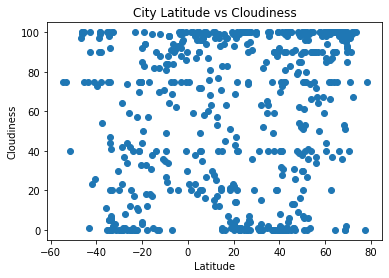

In [14]:
plt.scatter(city_lat,city_cloud)

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("lat-cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

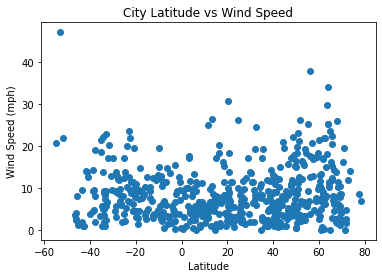

In [15]:
plt.scatter(city_lat,city_wind)

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("lat-wind.png")
plt.show()

## Linear Regression

In [16]:
north = city_df.loc[city_df['latitude'] >= 0]
south = city_df.loc[city_df['latitude'] < 0]

north_lat = north['latitude']
north_temp = north['max temperature']
north_hum = north['humidity']
north_wind = north['wind speed']
north_cloud =north['cloudiness']

south_lat = south['latitude']
south_temp = south['max temperature']
south_hum = south['humidity']
south_wind = south['wind speed']
south_cloud =south['cloudiness']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression